In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

/Users/spencerfogelman/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [181]:
y2015.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,time_elapsed,last_credit_pull_elapsed,next_pymnt_elapsed
0,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,10+ years,MORTGAGE,48000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,33.18,0.0,0.0,33.0,2.0,11.0,2.0,19108.0,19.0,w,13668.88,13668.88,4519.68,4519.68,2331.12,2188.56,0.0,0.0,0.0,379.39,0.0,33.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,31329.0,1.0,2.0,1.0,2.0,6.0,12221.0,91.0,1.0,4.0,14982.0,65.0,284700.0,0.0,0.0,1.0,6.0,2848.0,263953.0,17.6,0.0,0.0,131.0,294.0,11.0,6.0,2.0,11.0,76.0,11.0,76.0,2.0,6.0,9.0,6.0,8.0,6.0,9.0,11.0,9.0,11.0,0.0,0.0,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0,582.0,582.0,582.0
1,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,8 years,MORTGAGE,60000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,22.44,0.0,0.0,NaN,NaN,7.0,0.0,7722.0,9.0,w,6635.69,6635.69,3572.97,3572.97,2964.31,608.66,0.0,0.0,0.0,298.58,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,55387.0,0.0,3.0,0.0,0.0,47.0,47665.0,43.0,2.0,2.0,4744.0,50.0,13000.0,0.0,0.0,2.0,2.0,7912.0,4778.0,61.8,0.0,0.0,234.0,91.0,9.0,9.0,0.0,11.0,NaN,9.0,NaN,0.0,3.0,3.0,3.0,3.0,5.0,4.0,4.0,3.0,7.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0,582.0,582.0,582.0
2,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,10+ years,MORTGAGE,109000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,26.02,0.0,1.0,NaN,NaN,9.0,0.0,20862.0,19.0,w,0.00,0.00,26224.23,26224.23,25000.00,1224.23,0.0,0.0,0.0,20807.39,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,2.0,33976.0,17538.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0,704.0,582.0,NaN
3,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,10+ years,MORTGAGE,92000.0,Not Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,21.60,0.0,0.0,42.0,NaN,16.0,0.0,51507.0,24.0,w,19263.77,19263.77,10271.36,10271.36,8736.23,1535.13,0.0,0.0,0.0,858.05,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0,582.0,582.0,582.0
4,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,8 years,RENT,55000.0,Verified,Dec

In [180]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
y2015.dtypes

member_id                         float64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
purpose                            object
title                              object
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
mths_since_last_record            float64
open_acc                          float64
pub_rec                           

In [147]:
import datetime

In [148]:
datetime.datetime.now()

datetime.datetime(2018, 8, 6, 12, 27, 31, 952874)

In [149]:
y2015['last_pymnt_d'] = pd.to_datetime(y2015['last_pymnt_d'])

In [150]:
y2015['time_elapsed'] = datetime.datetime.now() - y2015['last_pymnt_d']

In [151]:
y2015['time_elapsed'] = y2015['time_elapsed'].apply(lambda x: x.days)

In [152]:
y2015['last_credit_pull_d'] = pd.to_datetime(y2015['last_credit_pull_d'])

In [153]:
y2015['last_credit_pull_elapsed'] = datetime.datetime.now() - y2015['last_credit_pull_d']

In [154]:
y2015['last_credit_pull_elapsed'] = y2015['last_credit_pull_elapsed'].apply(lambda x: x.days)

In [155]:
y2015['next_pymnt_d'] = pd.to_datetime(y2015['next_pymnt_d'])

In [156]:
y2015['next_pymnt_elapsed'] = datetime.datetime.now() - y2015['next_pymnt_d']

In [157]:
y2015['next_pymnt_elapsed'] = y2015['next_pymnt_elapsed'].apply(lambda x: x.days)

In [158]:
y2015.drop(['last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d'], axis=1, inplace=True)

In [159]:
y2015['time_elapsed'] = pd.to_numeric(y2015['time_elapsed'])
y2015['last_credit_pull_elapsed']  = pd.to_numeric(y2015['last_credit_pull_elapsed'] )
y2015['next_pymnt_elapsed'] = pd.to_numeric(y2015['next_pymnt_elapsed'])

In [160]:
y2015.dtypes.value_counts()

float64    88
object     23
dtype: int64

In [161]:
categorical = y2015.select_dtypes(include=['object']).columns
for i in categorical:
    column = y2015[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
application_type
2
verification_status_joint
3


In [162]:
y2015.drop(['id', 'url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util', 'sub_grade', 'addr_state', 'desc' ],axis=1, inplace=True)

In [163]:
y2015.tail()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,time_elapsed,last_credit_pull_elapsed,next_pymnt_elapsed
421092,38982739.0,13000.0,13000.0,13000.0,60 months,15.99%,316.07,D,5 years,RENT,...,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0,827.0,613.0,NaN
421093,39222577.0,12000.0,12000.0,12000.0,60 months,19.99%,317.86,E,1 year,RENT,...,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0,948.0,674.0,NaN
421094,38982659.0,20000.0,20000.0,20000.0,36 months,11.99%,664.20,B,10+ years,RENT,...,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0,582.0,582.0,551.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
y2015 = y2015[:-2]

In [165]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
X = pd.get_dummies(X)
X = X.dropna(axis=1)
y = y2015['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [166]:
X_train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,title_new day,title_new kitchen for momma!,title_odymeds,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
334333,47103338.0,3650.0,3650.0,3650.0,112.57,40000.0,11.82,1.0,0.0,7.0,...,0,0,0,0,1,1,0,0,0,0
193993,60303845.0,15000.0,15000.0,15000.0,457.97,95000.0,7.60,0.0,0.0,9.0,...,0,0,0,0,1,1,0,0,0,0
277101,52922398.0,16000.0,16000.0,16000.0,372.21,70000.0,20.88,0.0,2.0,12.0,...,0,0,0,0,1,1,0,0,0,0
241159,56650955.0,35000.0,35000.0,35000.0,802.29,92268.0,27.21,0.0,0.0,6.0,...,0,0,0,0,1,1,0,0,0,0
372714,44026021.0,18000.0,18000.0,18000.0,382.36,300000.0,3.71,0.0,0.0,9.0,...,0,0,0,0,1,1,0,0,0,0


In [167]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [168]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.993116573825
0.961117399805


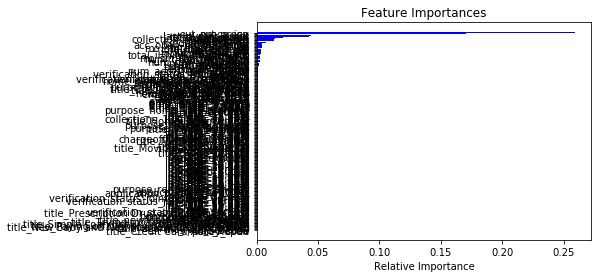

In [169]:
features = X.columns.values
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [170]:
importances_df = pd.DataFrame(importances)

In [171]:
importances_df['name'] = X.columns.values

In [172]:
importances_df.columns = ['importance', 'name']

In [173]:
importances_keep = importances_df[importances_df['importance'] > 0.01]

In [174]:
importances_keep.sort_values('importance')

,importance,name
1,0.011342,loan_amnt
3,0.011343,funded_amnt_inv
2,0.013874,funded_amnt
18,0.014160,total_rec_int
4,0.014733,installment
20,0.021783,recoveries
21,0.021844,collection_recovery_fee
15,0.042517,total_pymnt
16,0.043945,total_pymnt_inv
17,0.095894,total_rec_prncp


In [175]:
names = importances_keep['name'].values

In [176]:
rfc = ensemble.RandomForestClassifier()
X = X[names]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [177]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt
334333,3650.0,3650.0,3650.0,112.57,1613.06,1613.06,2362.570000,2362.57,2036.94,325.63,0.0,0.0,112.57
193993,15000.0,15000.0,15000.0,457.97,7849.69,7849.69,8233.060000,8233.06,7150.31,1082.75,0.0,0.0,457.97
277101,16000.0,16000.0,16000.0,372.21,0.00,0.00,16498.140000,16498.14,16000.00,498.14,0.0,0.0,16138.37
241159,35000.0,35000.0,35000.0,802.29,0.00,0.00,40388.970014,40388.97,35000.00,5388.97,0.0,0.0,29208.75
372714,18000.0,18000.0,18000.0,382.36,12132.79,12132.79,8769.300000,8769.30,5867.21,2902.09,0.0,0.0,382.36


In [178]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [179]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.988655408019
0.960966998868
